В каких из районов Нью-Йорка наиболее выгодно сдавать жилье в аренду, и какой это тип жилья? Вывести топ-10 вариантов (также построить гистограмму, иллюстрирующую это распределение).

In [1]:
options(repr.plot.width = 11)
options(repr.plot.height = 8)

In [2]:
library(plyr)

In [3]:
x <- read.csv('files/rents.csv')

In [4]:
head(x)

,X,District,Type,Building.Classification,Total.Units,Gross.Income.per.SqFt,Expense.per.SqFt,Net.Operating.Income,Market.Value.per.SqFt
1,0,Manhattan,Condominium,R9-CONDOMINIUM,42,36.51,9.37,990610,200
2,1,Manhattan,Condominium,R4-CONDOMINIUM,78,52.47,13.94,4870962,242.76
3,2,Manhattan,Condominium,RR-CONDOMINIUM,500,31.24,6.39,13767000,164.15
4,3,Manhattan,Condominium,R4-CONDOMINIUM,282,47.28,11.18,8991643,271.23
5,4,Manhattan,Condominium,R4-CONDOMINIUM,239,45.58,12.68,7221385,247.48
6,5,Manhattan,Condominium,R4-CONDOMINIUM,133,36.7,10.72,3629899,191.37


In [5]:
profit <- subset(x, select = c(District, Type))
profit[['Profit']] <- x[['Market.Value.per.SqFt']] - x[['Gross.Income.per.SqFt']] - x[['Expense.per.SqFt']]

In [6]:
head(profit)

,District,Type,Profit
1,Manhattan,Condominium,154.12
2,Manhattan,Condominium,176.35
3,Manhattan,Condominium,126.52
4,Manhattan,Condominium,212.77
5,Manhattan,Condominium,189.22
6,Manhattan,Condominium,143.95


In [7]:
top10 <- ddply(profit, c("District", "Type"), summarize, Mean = round(mean(Profit), 2))

In [8]:
top10 <- top10[order(-top10$Mean),]
rownames(top10) <- NULL

In [9]:
top10

,District,Type,Mean
1,Manhattan,Condominium,134.18
2,Manhattan,Cooperative,104.68
3,Brooklyn,Condominium,52.24
4,Queens,Condominium,51.49
5,Brooklyn,Cooperative,30.58
6,Bronx,Condominium,27.06
7,Queens,Cooperative,24.39
8,Staten Island,Condominium,21.94
9,Staten Island,Cooperative,14.25
10,Bronx,Cooperative,13.94


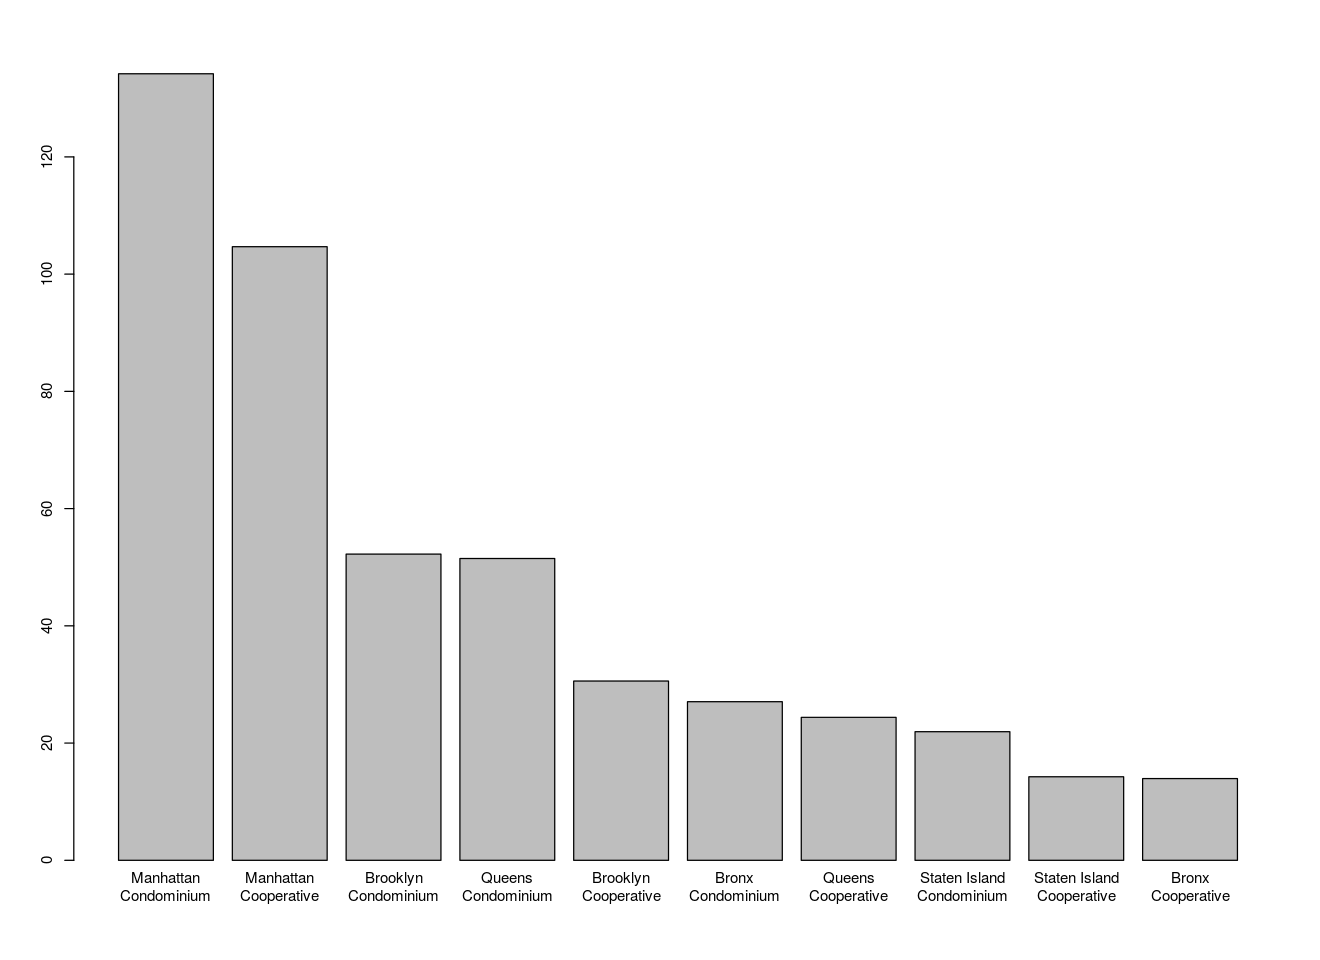

In [10]:
par(cex=0.75)
barplot(
    top10[, 3],
    names=c('Manhattan\nCondominium', 'Manhattan\nCooperative',
            'Brooklyn\nCondominium', 'Queens\nCondominium',
            'Brooklyn\nCooperative', 'Bronx\nCondominium',
            'Queens\nCooperative', 'Staten Island\nCondominium',
            'Staten Island\nCooperative', 'Bronx\nCooperative')
)

Какие сделки по купле/продаже недвижимости являются наиболее массовыми для каждого из районов?

In [11]:
units <- ddply(x, c("District", "Type"), summarize, Total.Units = sum(Total.Units))

In [12]:
units

,District,Type,Total.Units
1,Bronx,Condominium,11618
2,Bronx,Cooperative,47173
3,Brooklyn,Condominium,22643
4,Brooklyn,Cooperative,50473
5,Manhattan,Condominium,122267
6,Manhattan,Cooperative,186309
7,Queens,Condominium,25731
8,Queens,Cooperative,112266
9,Staten Island,Condominium,2044
10,Staten Island,Cooperative,1844


In [13]:
top5 <- ddply(units, c("District"), summarize, Total.Units = max(Total.Units))
top5 <- top5[order(-top5$Total.Units),]
rownames(top5) <- NULL
top5

,District,Total.Units
1,Manhattan,186309
2,Queens,112266
3,Brooklyn,50473
4,Bronx,47173
5,Staten Island,2044


Рейтинг по количеству арендованных недвижимостей можно увидеть сверху. Таблица типов домов по количеству аренд:
<table>
<tr>
    <td>Manhattan</td>
    <td>Cooperative</td>
</tr>
<tr>
    <td>Queens</td>
    <td>Cooperative</td>
</tr>
<tr>
    <td>Brooklyn</td>
    <td>Cooperative</td>
</tr>
<tr>
    <td>Bronx</td>
    <td>Cooperative</td>
</tr>
<tr>
    <td>Staten Island</td>
    <td>Condominium</td>
</tr>
</table>

Построить boxplot распределения процентов заработка от сдачи в наем жилья (средняя цена за единицу сдаваемой площади к средней стоимости единицы площади) по районам и типам жилья.

In [14]:
df_bp <- subset(x, select = c(District, Type))
df_bp[['Percentage']] <- (x[['Market.Value.per.SqFt']] - x[['Gross.Income.per.SqFt']] - x[['Expense.per.SqFt']]) / x[['Market.Value.per.SqFt']]

In [15]:
df_bp <- df_bp[df_bp$Percentage > 0,]

In [16]:
df_bp_bronx <- df_bp[df_bp$District == 'Bronx',]
df_bp_brkln <- df_bp[df_bp$District == 'Brooklyn',]
df_bp_mnhtn <- df_bp[df_bp$District == 'Manhattan',]
df_bp_quens <- df_bp[df_bp$District == 'Queens',]
df_bp_sttni <- df_bp[df_bp$District == 'Staten Island',]

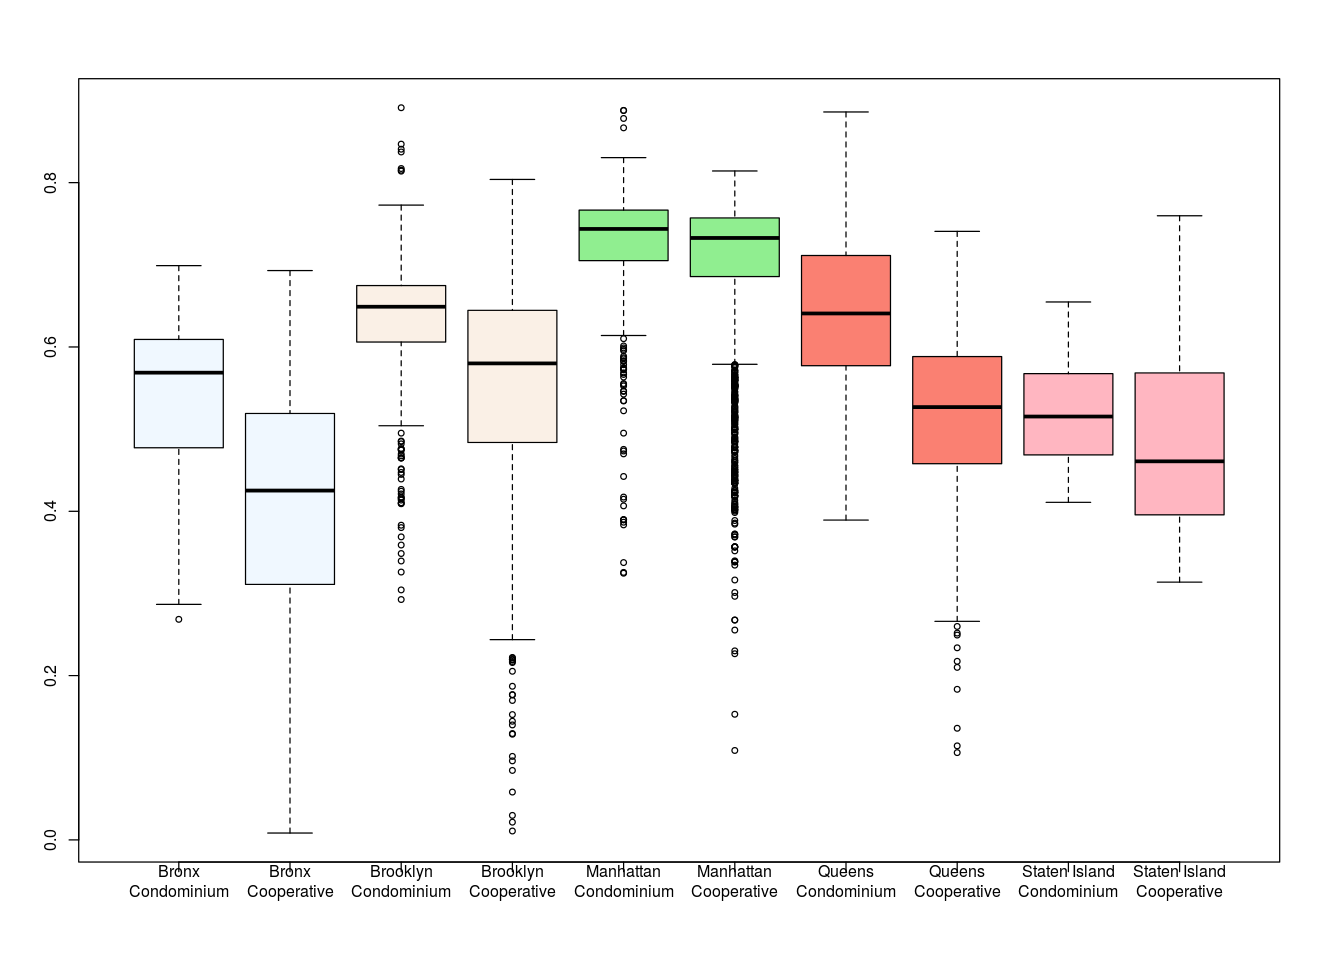

In [17]:
par(cex=0.8)
boxplot(
    df_bp_bronx[df_bp_bronx$Type == 'Condominium',][,3],
    df_bp_bronx[df_bp_bronx$Type == 'Cooperative',][,3],

    df_bp_brkln[df_bp_brkln$Type == 'Condominium',][,3],
    df_bp_brkln[df_bp_brkln$Type == 'Cooperative',][,3],

    df_bp_mnhtn[df_bp_mnhtn$Type == 'Condominium',][,3],
    df_bp_mnhtn[df_bp_mnhtn$Type == 'Cooperative',][,3],

    df_bp_quens[df_bp_quens$Type == 'Condominium',][,3],
    df_bp_quens[df_bp_quens$Type == 'Cooperative',][,3],

    df_bp_sttni[df_bp_sttni$Type == 'Condominium',][,3],
    df_bp_sttni[df_bp_sttni$Type == 'Cooperative',][,3],
    
    names=c('Bronx\nCondominium', 'Bronx\nCooperative',
    'Brooklyn\nCondominium', 'Brooklyn\nCooperative',
    'Manhattan\nCondominium', 'Manhattan\nCooperative',
    'Queens\nCondominium', 'Queens\nCooperative',
    'Staten Island\nCondominium', 'Staten Island\nCooperative'),
    
    col=c('aliceblue', 'aliceblue',
          'linen', 'linen',
          'lightgreen', 'lightgreen',
          'salmon', 'salmon',
          'lightpink', 'lightpink')
)